In [2]:
!pip install textblob     

import textblob            
from textblob import TextBlob

In [3]:
# Netflix Data Analytics and Sentiment Analysis Project

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [4]:
# Load the Netflix datasets (Assuming 5 CSV files: users.csv, subscriptions.csv, movies.csv, genres.csv, and watch_history.csv)
users = pd.read_csv(r'J:\4-PROJECTS\NETFLIX\user.csv')
subscriptions = pd.read_csv(r'J:\4-PROJECTS\NETFLIX\subscription.csv')
movies = pd.read_csv(r'J:\4-PROJECTS\NETFLIX\movies.csv')
genres = pd.read_csv(r'J:\4-PROJECTS\NETFLIX\genre.csv')
watch_history = pd.read_csv(r'J:\4-PROJECTS\NETFLIX\watch_history.csv')

In [5]:
# Display first few rows of each dataset
print("Users:")
print(users.head())

print("\nSubscriptions:")
print(subscriptions.head())

print("\nMovies:")
print(movies.head())

print("\nGenres:")
print(genres.head())

print("\nWatch History:")
print(watch_history.head())

Users:
   user_id             name                       email  age    country  \
0        1   Elijah Johnson  chase34@rodriguez-park.com   46         UK   
1        2       Rachel Fry             tryan@smith.com   41     Canada   
2        3  Steven Sosa DDS  lorimontgomery@hotmail.com   43         UK   
3        4   Kristin Chaney          krista43@lucas.org   64     Canada   
4        5     Denise Stone      moorecolin@hotmail.com   69  Australia   

   gender  
0  Female  
1    Male  
2    Male  
3    Male  
4  Female  

Subscriptions:
   subscription_id  user_id plan_type  start_date    end_date    status
0                1      403  Standard  2023-09-04         NaN  Inactive
1                2      418   Premium  2023-03-31  2023-06-14    Active
2                3      329     Basic  2023-07-10         NaN  Inactive
3                4      271  Standard  2024-01-30  2024-10-17    Active
4                5      232  Standard  2024-06-06  2025-02-16    Active

Movies:
   movie_id  

In [6]:
# Data Cleaning
# Check for missing values in each dataset
print("\nMissing Values:")
print("Users:\n", users.isnull().sum())
print("Subscriptions:\n", subscriptions.isnull().sum())
print("Movies:\n", movies.isnull().sum())
print("Genres:\n", genres.isnull().sum())
print("Watch History:\n", watch_history.isnull().sum())


Missing Values:
Users:
 user_id    0
name       0
email      0
age        0
country    0
gender     0
dtype: int64
Subscriptions:
 subscription_id      0
user_id              0
plan_type            0
start_date           0
end_date           261
status               0
dtype: int64
Movies:
 movie_id        0
title           0
release_year    0
genre_id        0
duration        0
rating          0
reviews         0
dtype: int64
Genres:
 genre_id      0
genre_name    0
dtype: int64
Watch History:
 watch_id          0
user_id           0
movie_id          0
watch_date        0
watch_duration    0
dtype: int64


In [7]:
# Fill or drop missing values
users.fillna('Unknown', inplace=True)
subscriptions.fillna({'plan': 'Basic', 'price': 9.99}, inplace=True)
movies.fillna({'rating': 'Not Rated', 'duration': movies['duration'].median()}, inplace=True)
# watch_history.dropna(subset=['watch_time'], inplace=True)

In [8]:
# Merge datasets for analysis
merged_data = pd.merge(watch_history, users, on='user_id', how='left')
merged_data = pd.merge(merged_data, movies, on='movie_id', how='left')
merged_data = pd.merge(merged_data, genres, on='genre_id', how='left')
merged_data = pd.merge(merged_data, subscriptions, on='user_id', how='left')

In [9]:
# Display merged dataset
print("\nMerged Data:")
print(merged_data.head())


Merged Data:
   watch_id  user_id  movie_id  watch_date  watch_duration            name  \
0         1      179       461  2023-06-05              48     Eric Carson   
1         1      179       461  2023-06-05              48     Eric Carson   
2         2      100       330  2024-03-05              53  Chelsea Nelson   
3         3      364       300  2024-02-24              67  Rebekah Joseph   
4         3      364       300  2024-02-24              67  Rebekah Joseph   

                     email  age    country  gender  ... genre_id  duration  \
0   brentsmith@hotmail.com   19     France    Male  ...        7        90   
1   brentsmith@hotmail.com   19     France    Male  ...        7        90   
2  willienewman@golden.com   57     Brazil  Female  ...        1        73   
3          ysoto@yahoo.com   69  Australia  Female  ...        7        64   
4          ysoto@yahoo.com   69  Australia  Female  ...        7        64   

   rating   reviews  genre_name subscription_id 

In [10]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_15808\3407306981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_counts.index, y=plan_counts.values, palette='viridis')


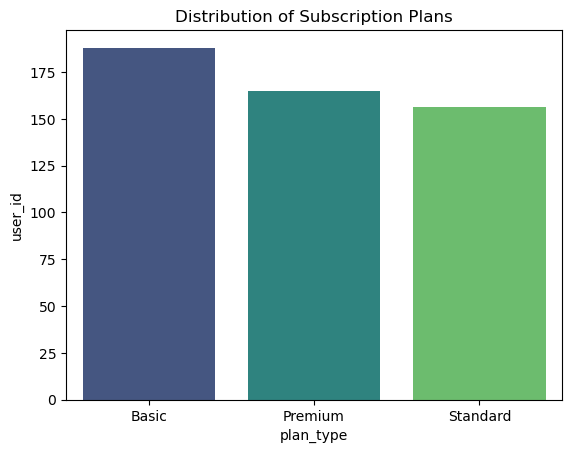

In [11]:
# 1. Distribution of Subscription Plans
plan_counts = merged_data['plan_type'].value_counts()
sns.barplot(x=plan_counts.index, y=plan_counts.values, palette='viridis')
plt.title('Distribution of Subscription Plans')
plt.xlabel('plan_type')
plt.ylabel('user_id')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_15808\3230096071.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')


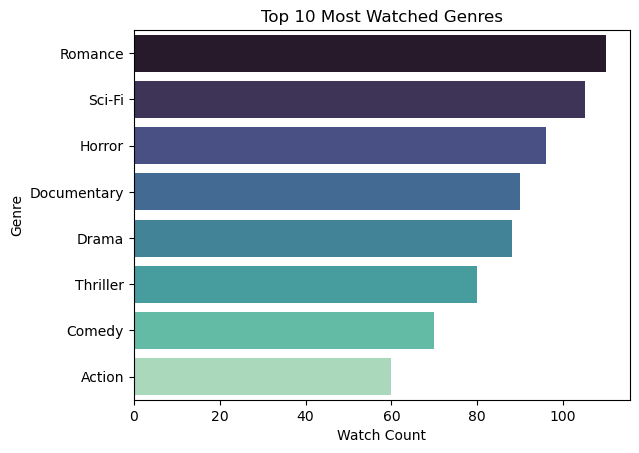

In [12]:
# 2. Most Watched Genres
genre_counts = merged_data['genre_name'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Watch Count')
plt.ylabel('Genre')
plt.show()


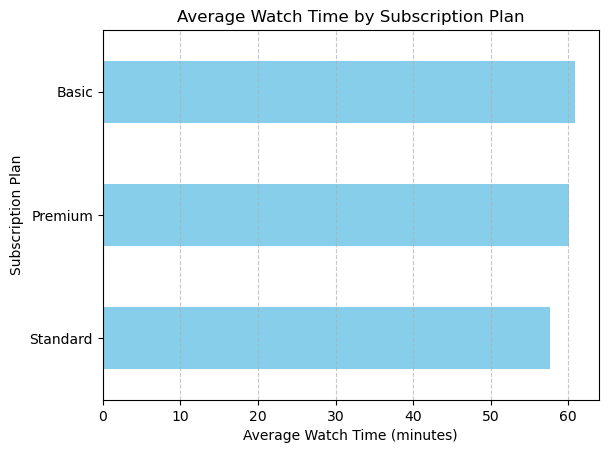

In [13]:
# 3. Average Watch Time by Subscription Plan
avg_watch_time = merged_data.groupby('plan_type')['watch_duration'].mean().sort_values()
avg_watch_time.plot(kind='barh', color='skyblue')
plt.title('Average Watch Time by Subscription Plan')
plt.xlabel('Average Watch Time (minutes)')
plt.ylabel('Subscription Plan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

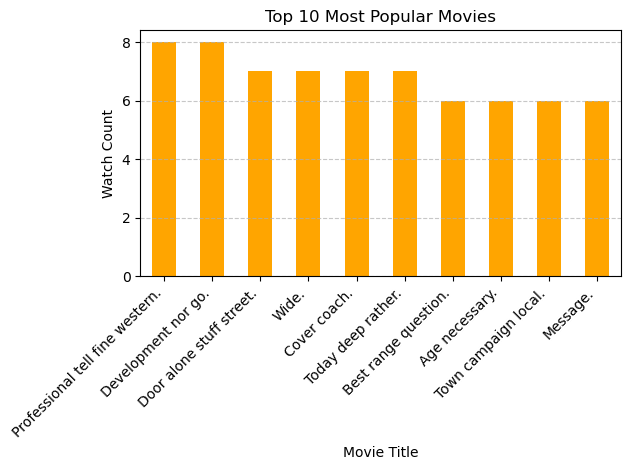

In [14]:
# 4. Most Popular Movies
popular_movies = merged_data['title'].value_counts().head(10)
popular_movies.plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Watch Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

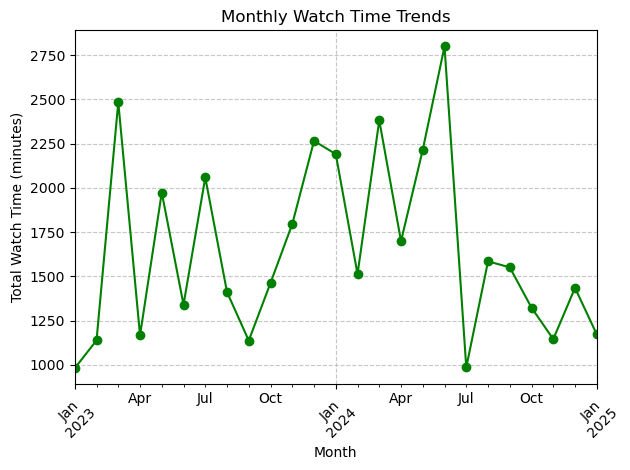

In [15]:
# 5. Monthly Watch Trends
merged_data['watch_month'] = pd.to_datetime(merged_data['watch_date']).dt.to_period('M')
monthly_trends = merged_data.groupby('watch_month')['watch_duration'].sum()
monthly_trends.plot(kind='line', marker='o', color='green')
plt.title('Monthly Watch Time Trends')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Sentiment Analysis
if 'reviews' in movies.columns:
    print("\nPerforming Sentiment Analysis on Movie Reviews...")

    # Add sentiment scores to the movies dataset
    def get_sentiment(text):
        blob = TextBlob(text)
        return blob.sentiment.polarity

    movies['sentiment_score'] = movies['reviews'].apply(lambda x: get_sentiment(str(x)))

    # Categorize sentiment as Positive, Neutral, or Negative
    def categorize_sentiment(score):
        if score > 0.1:
            return 'Positive'
        elif score < -0.1:
            return 'Negative'
        else:
            return 'Neutral'

    movies['sentiment_category'] = movies['sentiment_score'].apply(categorize_sentiment)


Performing Sentiment Analysis on Movie Reviews...


C:\Users\USER\AppData\Local\Temp\ipykernel_15808\2103003951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


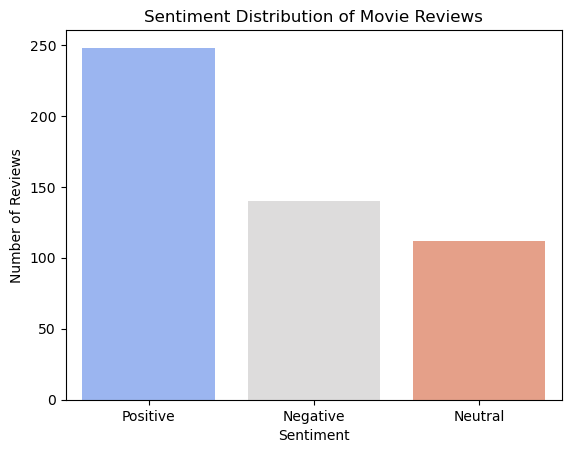

In [17]:
# Visualize sentiment distribution
sentiment_counts = movies['sentiment_category'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Distribution of Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [18]:
# Top 10 movies with the highest positive sentiment
top_positive_movies = movies.nlargest(10, 'sentiment_score')
print("\nTop 10 Movies with Highest Positive Sentiment:")
print(top_positive_movies[['title', 'sentiment_score']])


Top 10 Movies with Highest Positive Sentiment:
                      title  sentiment_score
1                    Enjoy.         0.227273
2         Consider eye and.         0.227273
3          Record building.         0.227273
5             Recently far.         0.227273
7                 Down two.         0.227273
8      Quickly large color.         0.227273
15        Player who dream.         0.227273
16  Mention American enjoy.         0.227273
17          House business.         0.227273
19             Seem choose.         0.227273


In [19]:
# Save sentiment analysis results
movies.to_csv('movies_with_sentiment.csv', index=False)
print("\nMovies dataset with sentiment scores saved to 'movies_with_sentiment.csv'")



Movies dataset with sentiment scores saved to 'movies_with_sentiment.csv'


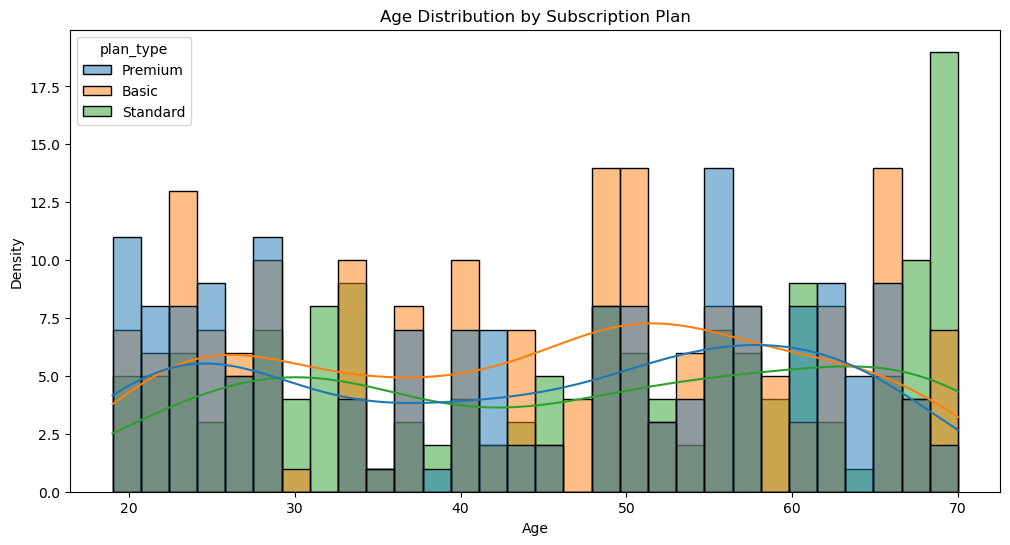

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='age', hue='plan_type', kde=True, palette='tab10', bins=30)
plt.title('Age Distribution by Subscription Plan')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15808\802395857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='genre_name', y='rating', palette='Set3')


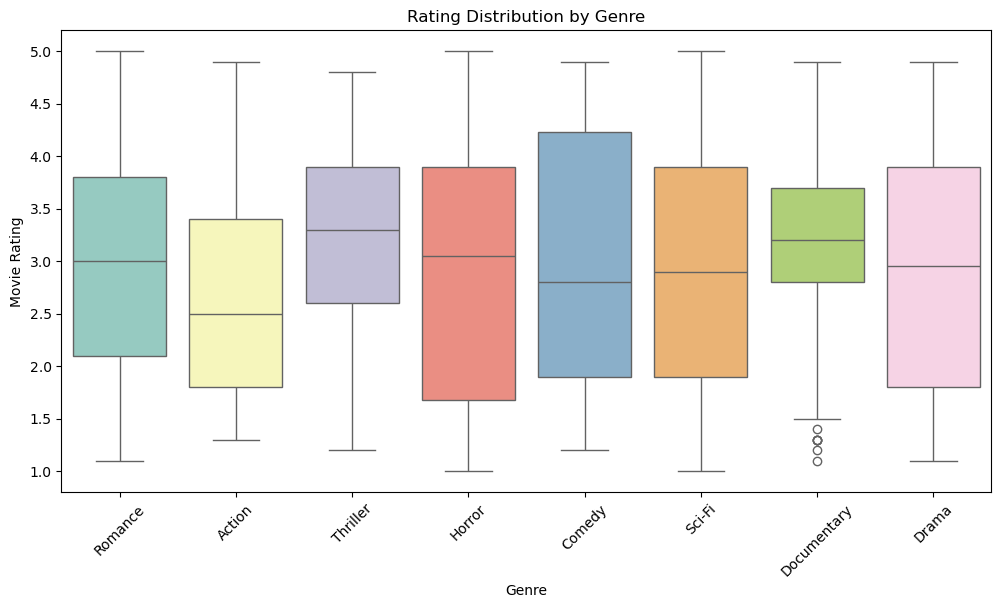

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='genre_name', y='rating', palette='Set3')
plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.xticks(rotation=45)
plt.show()


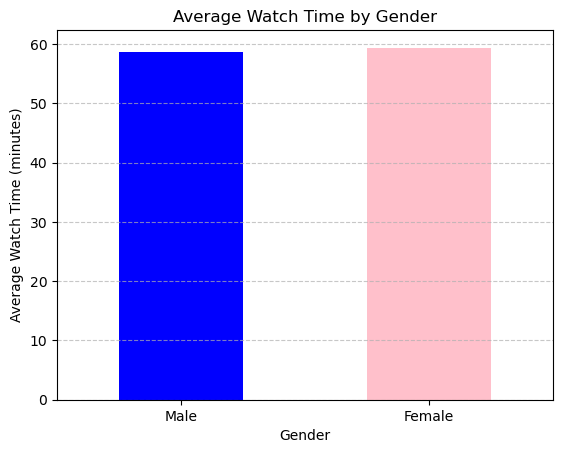

In [25]:
gender_engagement = merged_data.groupby('gender')['watch_duration'].mean().sort_values()
gender_engagement.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Watch Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Watch Time (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


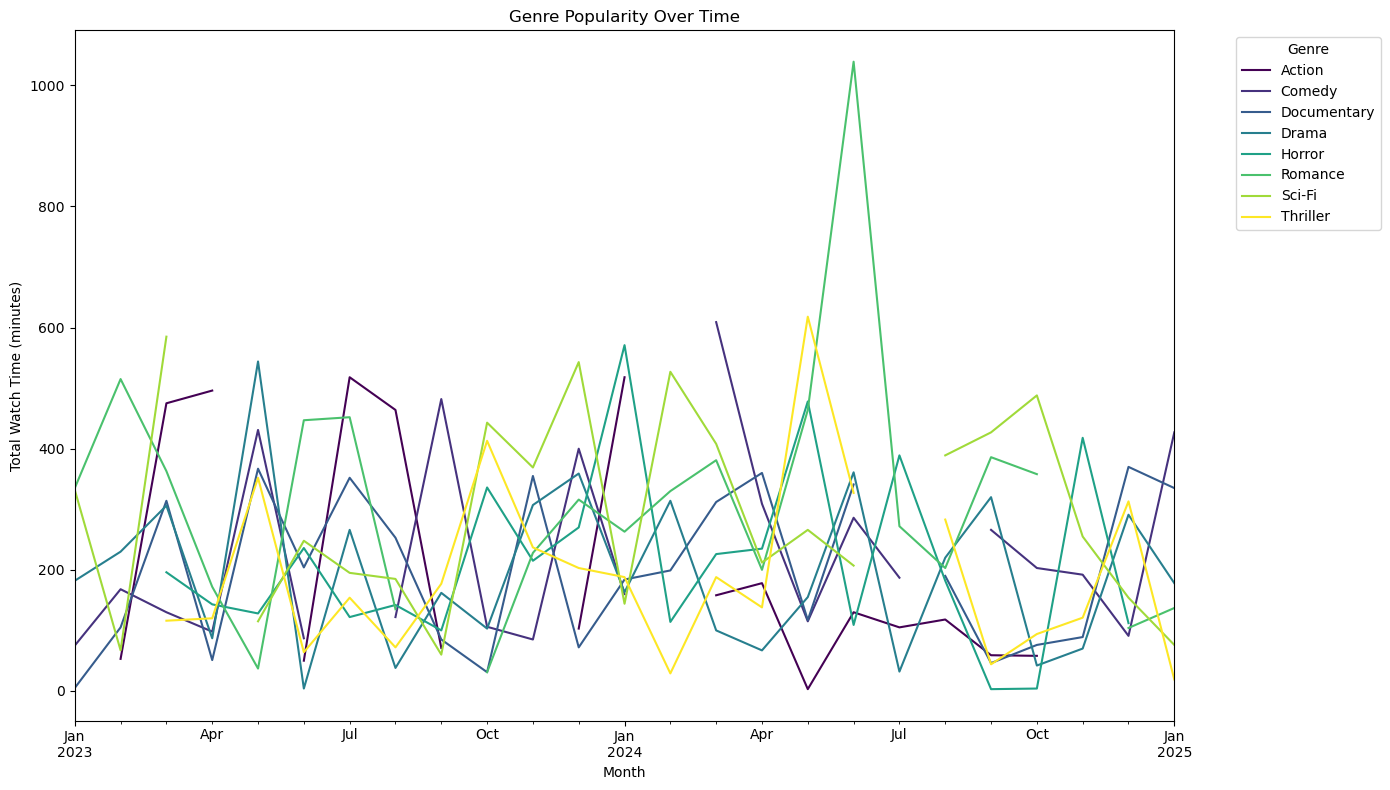

In [27]:
genre_trends = merged_data.groupby(['watch_month', 'genre_name'])['watch_duration'].sum().unstack()
genre_trends.plot(kind='line', figsize=(14, 8), colormap='viridis')
plt.title('Genre Popularity Over Time')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (minutes)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15808\1637042180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plan_counts.index, y=plan_counts.values, palette='viridis')


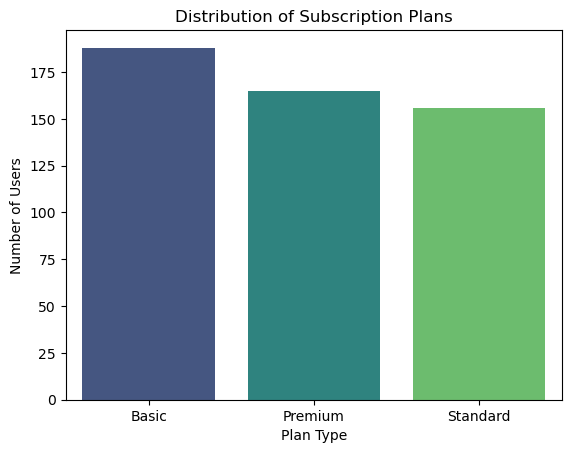

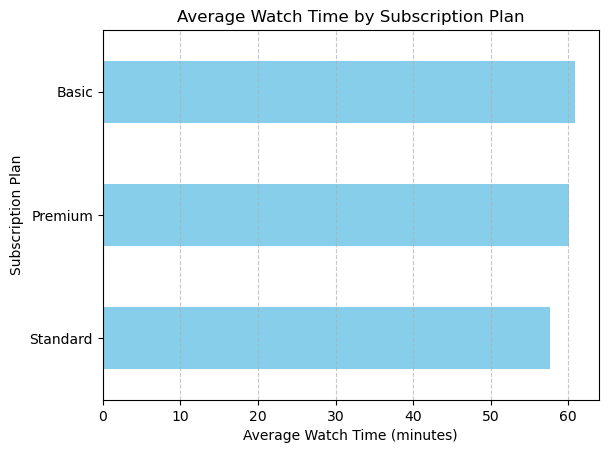

In [30]:
# Distribution of Subscription Plans
plan_counts = merged_data['plan_type'].value_counts()
sns.barplot(x=plan_counts.index, y=plan_counts.values, palette='viridis')
plt.title('Distribution of Subscription Plans')
plt.xlabel('Plan Type')
plt.ylabel('Number of Users')
plt.show()

# Average Watch Time by Subscription Plan
avg_watch_time = merged_data.groupby('plan_type')['watch_duration'].mean().sort_values()
avg_watch_time.plot(kind='barh', color='skyblue')
plt.title('Average Watch Time by Subscription Plan')
plt.xlabel('Average Watch Time (minutes)')
plt.ylabel('Subscription Plan')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_15808\3851554883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')


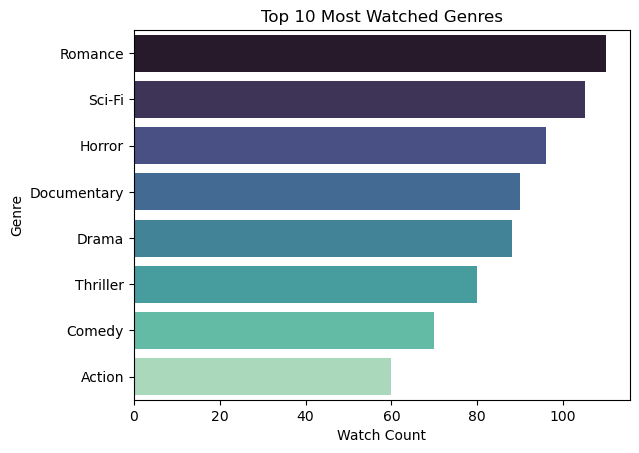

In [31]:
# Most Watched Genres
genre_counts = merged_data['genre_name'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='mako')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Watch Count')
plt.ylabel('Genre')
plt.show()


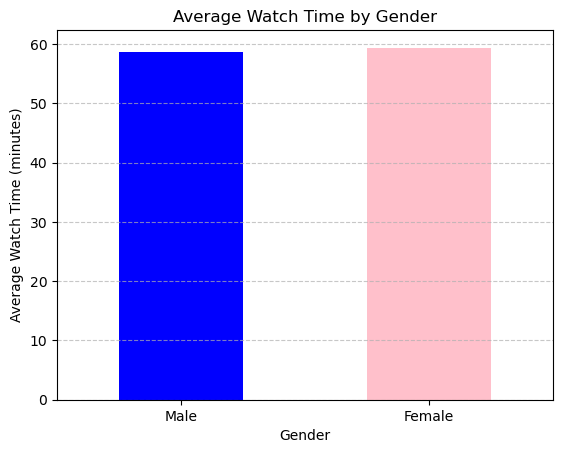

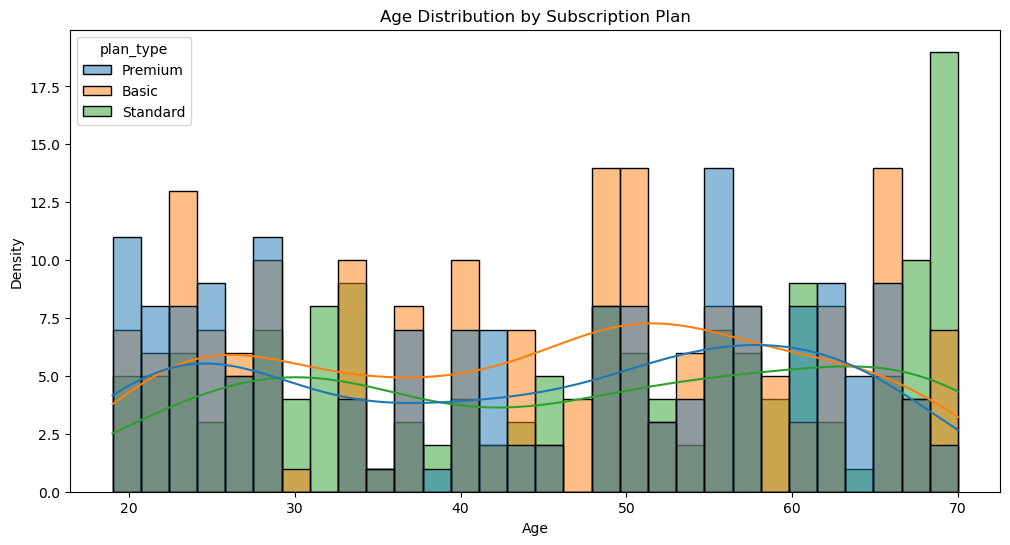

In [34]:
# Average Watch Time by Gender
gender_engagement = merged_data.groupby('gender')['watch_duration'].mean().sort_values()
gender_engagement.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Watch Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Watch Time (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Age Distribution and Engagement
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_data, x='age', hue='plan_type', kde=True, palette='tab10', bins=30)
plt.title('Age Distribution by Subscription Plan')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


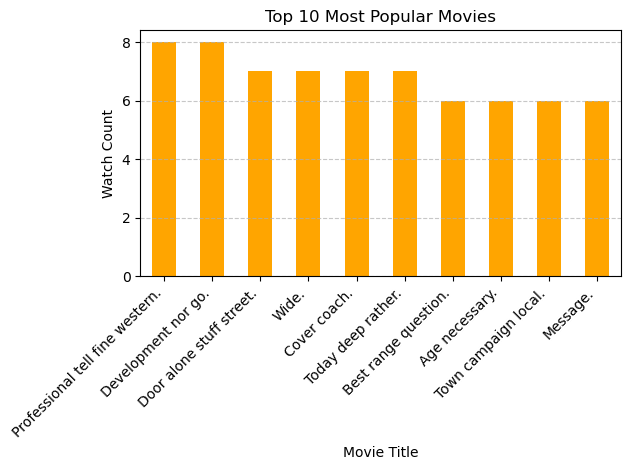

C:\Users\USER\AppData\Local\Temp\ipykernel_15808\2394552049.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_positive_movies['title'], x=top_positive_movies['sentiment_score'], palette='coolwarm')


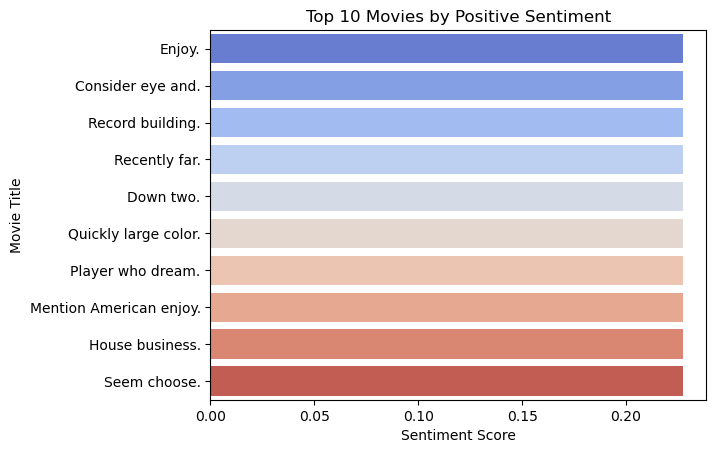

In [36]:
# Most Popular Movies
popular_movies = merged_data['title'].value_counts().head(10)
popular_movies.plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Movies')
plt.xlabel('Movie Title')
plt.ylabel('Watch Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top Movies by Sentiment
if 'sentiment_score' in movies.columns:
    top_positive_movies = movies.nlargest(10, 'sentiment_score')
    sns.barplot(y=top_positive_movies['title'], x=top_positive_movies['sentiment_score'], palette='coolwarm')
    plt.title('Top 10 Movies by Positive Sentiment')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Movie Title')
    plt.show()


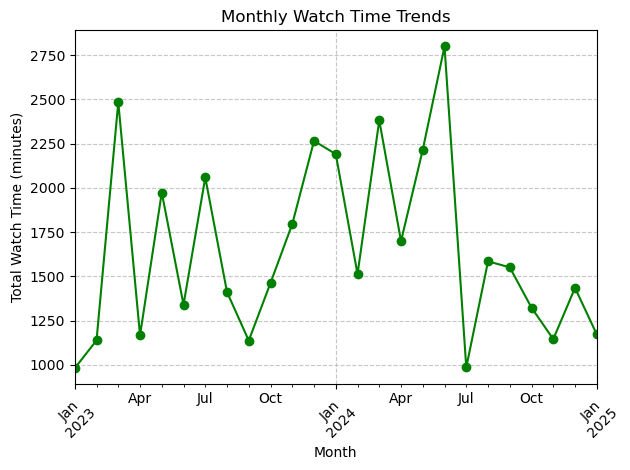

In [38]:
# Monthly Watch Trends
merged_data['watch_month'] = pd.to_datetime(merged_data['watch_date']).dt.to_period('M')
monthly_trends = merged_data.groupby('watch_month')['watch_duration'].sum()
monthly_trends.plot(kind='line', marker='o', color='green')
plt.title('Monthly Watch Time Trends')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


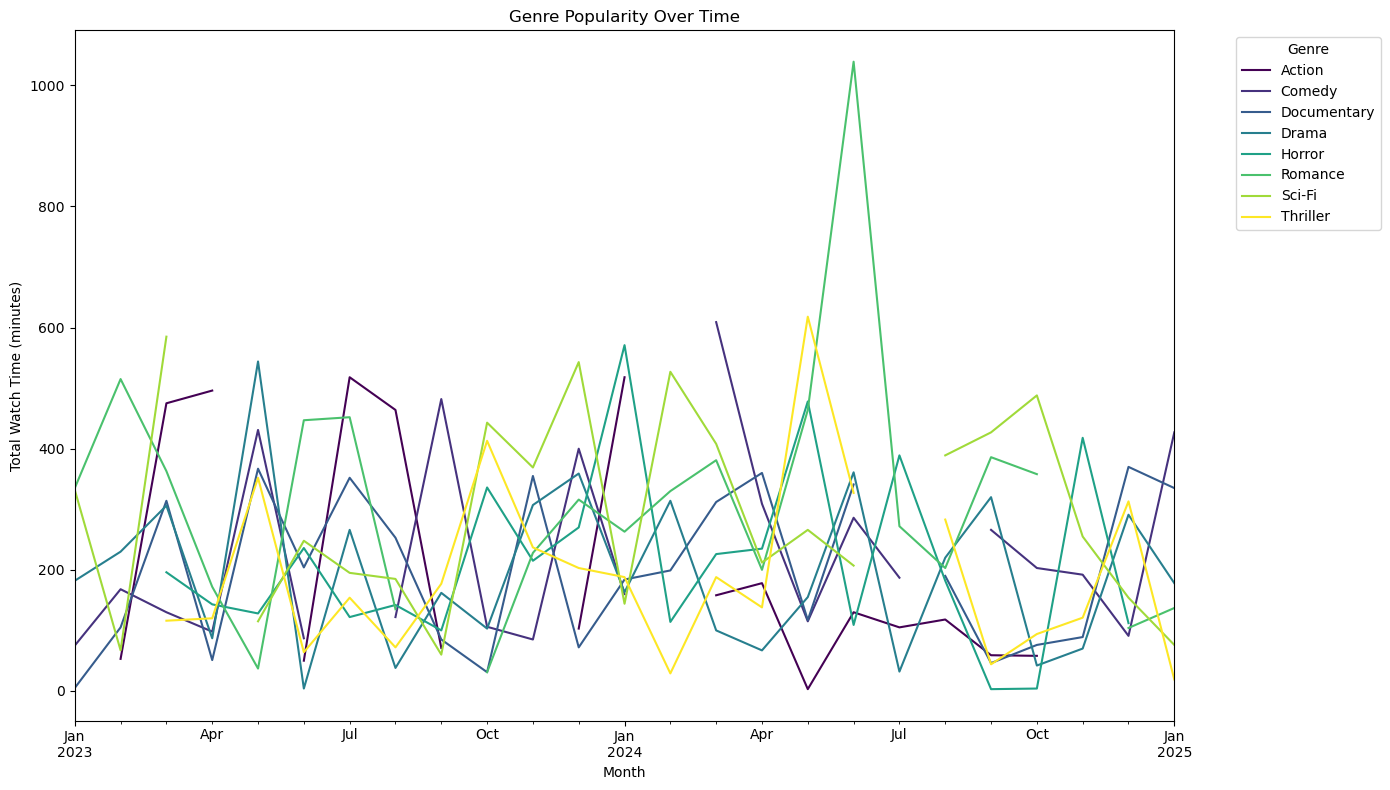

In [40]:
# Genre Trends Over Time
genre_trends = merged_data.groupby(['watch_month', 'genre_name'])['watch_duration'].sum().unstack()
genre_trends.plot(kind='line', figsize=(14, 8), colormap='viridis')
plt.title('Genre Popularity Over Time')
plt.xlabel('Month')
plt.ylabel('Total Watch Time (minutes)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
